### 1. Importe as bibliotecas necessárias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. Importe o arquivo 89cement data .csv para um DataFrame chamado data.

In [4]:
data = pd.read_csv('89cement data .csv')
data.head()

,Month,Production,Sales,demand,population,gdp,disbusment,interestrate,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Jan-10,347.0,322.0,346.0,122.4,182277.0,60314.00,10.25,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-10,306.0,285.0,338.0,122.5,181018.0,61213.92,10.33,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-10,236.0,245.0,276.0,122.6,179759.0,62113.83,10.42,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-10,234.0,212.0,245.0,122.8,178500.0,63013.75,10.50,NaN,NaN,NaN,NaN,NaN,NaN
4,May-10,296.0,289.0,312.0,122.9,177354.0,63913.67,10.58,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Verifiquei o tipo dos dados e o tamanho do dataframe.

In [5]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         155 non-null    object 
 1   Production    155 non-null    float64
 2   Sales         155 non-null    float64
 3   demand        155 non-null    float64
 4   population    155 non-null    float64
 5   gdp           155 non-null    float64
 6   disbusment    155 non-null    float64
 7   interestrate  155 non-null    float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(13), object(1)
memory usage: 109.4+ KB


(999, 14)

### 4. Removi as colunas que não serão utilizadas.

In [10]:
data = data.drop(['Unnamed: 8'], axis=1, inplace=False)
data = data.drop(['Unnamed: 9'], axis=1, inplace=False)
data = data.drop(['Unnamed: 10'], axis=1, inplace=False)
data = data.drop(['Unnamed: 11'], axis=1, inplace=False)
data = data.drop(['Unnamed: 12'], axis=1, inplace=False)
data = data.drop(['Unnamed: 13'], axis=1, inplace=False)
data.tail(10)

,Month,Production,Sales,demand,population,gdp,disbusment,interestrate
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. Verifiquei se existem valores duplicados e nulos.

In [11]:
nulos = data.isnull().sum()
duplicados = data.duplicated().sum()
print('Existem {} valores nulos'.format(nulos))
print('Existem {} valores duplicados'.format(duplicados))

Existem Month           844
Production      844
Sales           844
demand          844
population      844
gdp             844
disbusment      844
interestrate    844
dtype: int64 valores nulos
Existem 843 valores duplicados


### 6. Excluí os valores nulos e duplicados.

In [44]:
data = data.dropna()
data = data.drop_duplicates()

data.tail()
# Exportei o dataframe para um arquivo csv.
data.to_csv('demand.csv', index=False)

### 7. Criei uma matriz de correlação e um mapa de calor para visualizar a correlação entre as variáveis.

C:\Users\Admin\AppData\Local\Temp\ipykernel_688\2688929342.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
C:\Users\Admin\AppData\Local\Temp\ipykernel_688\2688929342.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

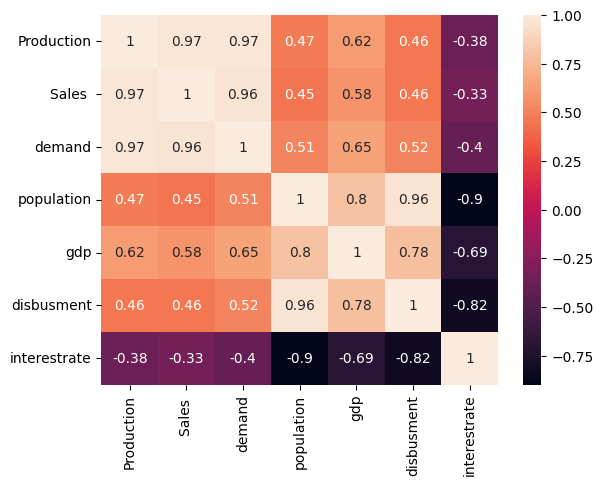

In [13]:
data.corr()
sns.heatmap(data.corr(), annot=True)

### Conclusão:
Podemos concluir que as variáveis com mais correlação com a demanda são:
1. Produção;
2. Vendas;
3. GDP;
4. Desembolsos de capital (Emprestimos);

### 8. Criei uma matriz de dispersão para visualizar a relação entre as variáveis mais importantes e a demanda.

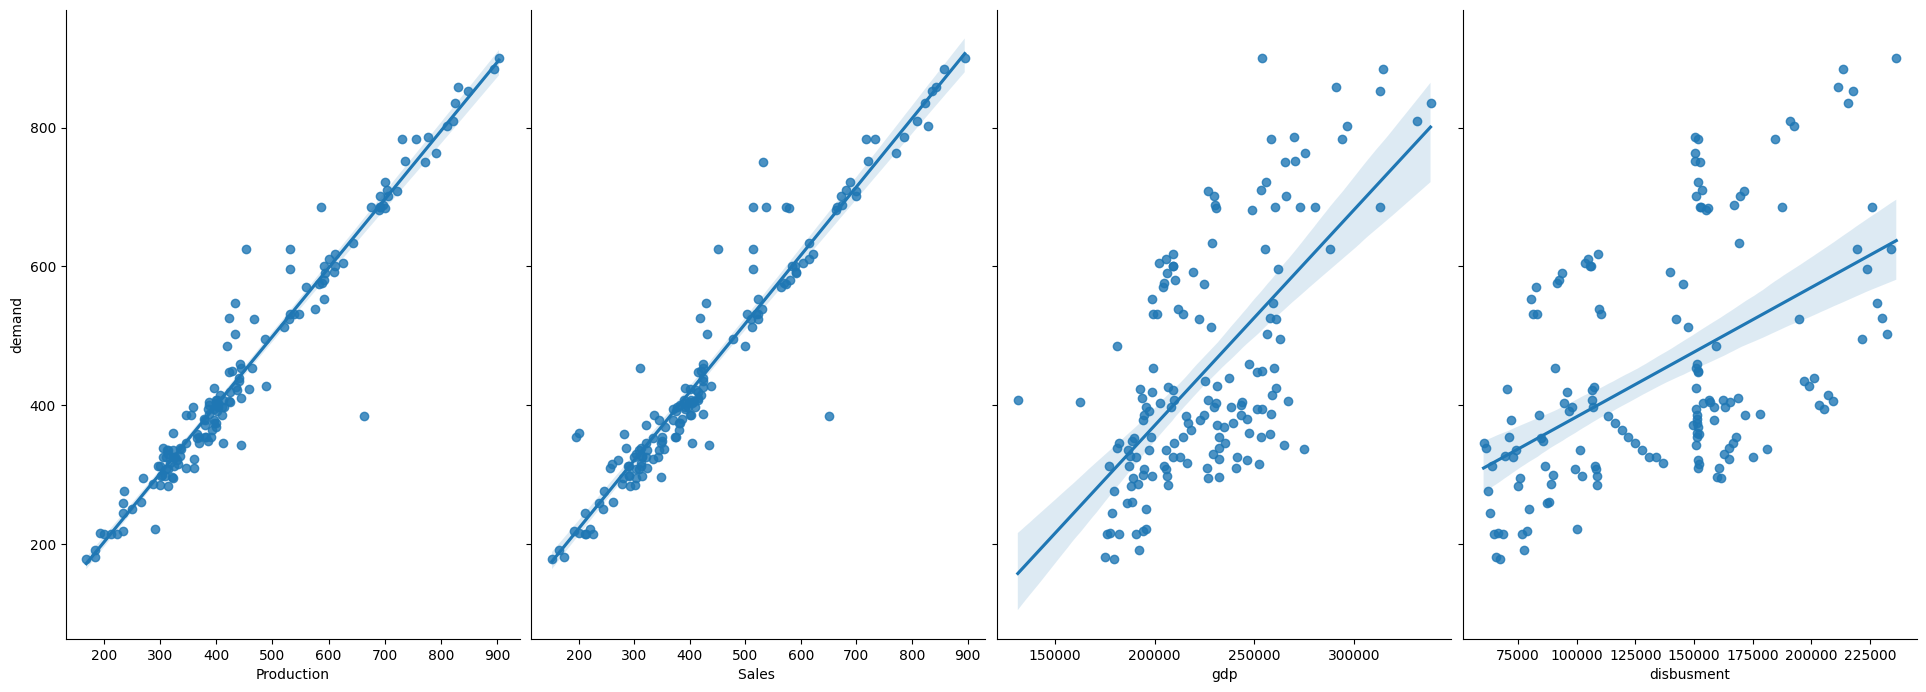

In [28]:
sns.pairplot(data, x_vars=['Production', 'Sales ', 'gdp', 'disbusment'], y_vars='demand', height=7, aspect=0.7, kind='reg')

### 9. Criei um gráfico de linha para visualizar a demanda ao longo dos meses.

Text(0, 0.5, 'Demanda')

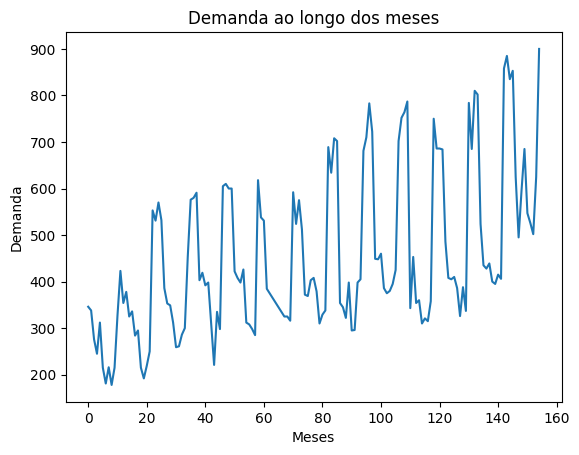

In [35]:
plt.plot(data['demand'])
plt.title('Demanda ao longo dos meses')
plt.xlabel('Meses')
plt.ylabel('Demanda')

### Conclusão:
Podemos concluir que a demanda é crescente ao longo dos meses.

### 10. Criei um modelo de regressão linear múltipla para prever a demanda de cimento e fiz deploy do modelo no Streamlit.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 11. Dividi o conjunto de dados em variáveis independentes e dependentes.

In [40]:
X = data[['Production', 'Sales ', 'gdp', 'disbusment']]
y = data['demand']

### 12. Dividi o conjunto de dados em conjunto de treinamento e conjunto de teste.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 13. Treinei o modelo de regressão linear múltipla.

In [ ]:
data_model = LinearRegression()
data_model.fit(X_train, y_train)

### 14. Fiz as previsões.

In [ ]:
y_pred = data_model.predict(X_test)

### 15. Avaliei o modelo.

In [ ]:
# Imprimindo os coeficientes
print('Coeficientes: \n', data_model.coef_)
# Imprimindo o erro quadrático médio
print('Erro quadrático médio: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# Imprimindo o coeficiente de determinação: 1 é perfeito previsão
print('Coeficiente de determinação: %.2f'
      % metrics.r2_score(y_test, y_pred))

### 16. Criei uma função para fazer previsões.

In [42]:
def predict_demand(production, sales, gdp, disbusment):
    x = np.zeros(len(X.columns))
    x[0] = production
    x[1] = sales
    x[2] = gdp
    x[3] = disbusment
    return data_model.predict([x])[0]

### 17. Criei um arquivo app.py para fazer deploy do modelo no Streamlit.